In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = "serif"
#plt.rcParams['font.serif'] = "cm"

import numpy as np
from sympy import solve, Matrix, symbols, Eq,latex,simplify,sqrt
from ipywidgets import interact, interactive,FloatSlider,IntSlider,ToggleButton
e,c,d,b,K,K2,a,r,x,y=symbols('e c d b K K2 a r x y')
from rmModel_py3 import rmModel,Es_normal
Es_normal['rhs']='RM_Allee_effect'

In [2]:
m = rmModel(Es=Es_normal,Ps='auto/rm_set1.hdf5',Vs=None)
p=m.p.copy()
print(p)

dxdt =  -c*x*y/(b + x) + r*x*(-1.0 + x/K2)*(1.0 - x/K)
dydt =  c*e*x*y/(b + x) - d*y
Local Jacobian: Matrix([[c*x*y/(b + x)**2 - c*y/(b + x) + r*(-1.0 + x/K2)*(1.0 - x/K) + r*x*(1.0 - x/K)/K2 - r*x*(-1.0 + x/K2)/K, -c*x/(b + x)], [-c*e*x*y/(b + x)**2 + c*e*y/(b + x), c*e*x/(b + x) - d]])
Time to setup:  4.571413040161133
{'K': 1.0, 'K2': 0.4, 'a': 0.0, 'b': 0.3, 'c': 12.566370614359172, 'd': 6.283185307179586, 'e': 1.0, 'omegaf': 1.0, 'r': 6.283185307179586}


In [3]:
jac=m.sym_localJac.subs(a,0)
dxdt=m.dxdt_eq
dydt=m.dydt_eq
print('\\frac{dx}{dt}=',latex(dxdt))
print('\\frac{dy}{dt}=',latex(dydt.subs(a,0)))

\frac{dx}{dt}= - \frac{c x y}{b + x} + r x \left(-1.0 + \frac{x}{K_{2}}\right) \left(1.0 - \frac{x}{K}\right)
\frac{dy}{dt}= \frac{c e x y}{b + x} - d y


\begin{align}
\frac{dx}{dt} &= r x \left(-1.0 + \frac{x}{K_{2}}\right) \left(1.0 - \frac{x}{K}\right) - \frac{c x y}{b + x}\\
\frac{dy}{dt} &= \frac{c e x y}{b + x} - d y
\end{align}

In [4]:
xs=0
ys=0

In [5]:
xs=b*d/(e*c-d)
ys=simplify(solve(Eq(dxdt/x,0),y)[0].subs(x,xs))

In [6]:
print('xs =',xs)
print('ys =',ys)

xs = b*d/(c*e - d)
ys = -b*e*r*(K*K2*(c*e - d)**2 + b**2*d**2 - b*d*(K + K2)*(c*e - d))/(K*K2*(c*e - d)**3)


In [7]:
simplify(dydt.subs([(x,xs),(y,ys)]))

0

In [8]:
jac_s=jac.subs([(x,xs),(y,ys)])
jac_s_e = jac_s.subs([(c,p['c']),(d,p['d']),(b,p['b']),(K,p['K']),(r,p['r']),(K2,p['K2'])])
jac_s_r = jac_s.subs([(c,p['c']),(d,p['d']),(b,p['b']),(K,p['K']),(e,0.73),(K2,p['K2'])])

In [9]:
print(simplify(jac_s_e.eigenvals()))

{-sqrt(31815858789811554334983421735519893618270254093464503399868690152618107320962705800295728550435067109755522775242506240000000000000000000000000000000000*e**8 - 96242972839179635814096341360899222895299224192918673728170556878447819987745939722587172348738768950160309204535714709273577646981120000000000000000000*e**7 + 114740911988693084756594696957030961641057094469715827871586590374100359270459113174602213073797333332222774092374888238918442289306131174947437936640000*e**6 - 67355167303617536079352941459161246278150595657307081071567751364264829033731361591947258657348507788223229137047014496031420535422844254718665162752000*e**5 + 20717592422896479456308607719677761415263614095636346428988199576408538567784240907473908454345072523753798309263590541944241130069059347625796237721600*e**4 - 4014887961737657609146662522462022394688012853505350394951798041736654815083381790732855088122506735059681725363476257866694759161572406863415048519680*e**3 + 643230289644593332812056502978591

In [10]:
real_eigval = simplify(-d*r*(-K*c*e + K*d + b*c*e + b*d)/(2*K*c*e*(c*e - d)))
print(real_eigval)
print(solve(Eq(real_eigval,0),e)[0].subs([(c,p['c']),(d,p['d']),(b,p['b']),(K,p['K']),(r,p['r'])]).evalf())

-d*r*(-K*c*e + K*d + b*c*e + b*d)/(2*K*c*e*(c*e - d))
0.928571428571429


In [11]:
diff_real_eigval = real_eigval.diff(e)
print(solve(Eq(diff_real_eigval,0),e)[0].subs([(c,p['c']),(d,p['d']),(b,p['b']),(K,p['K']),(r,p['r'])]).evalf())

0.297731366690868


In [12]:
#def print_eigvals(e_num):
#    g=jac_s_e.subs(e,e_num)
#    print(np.linalg.eigvals(np.array(g).astype(np.complex64)))
    

#e_w = FloatSlider(min=0.0,max=2.0,step=0.01,value=1.0)
#interact(print_eigvals,e_num=e_w)

In [13]:
e_range = np.linspace(0.6,1.0,100)
real_eigs = np.zeros_like(e_range)
imag_eigs = np.zeros_like(e_range)
for i,e_i in enumerate(e_range):
    g=jac_s_e.subs(e,e_i)
    eigs = np.linalg.eigvals(np.array(g).astype(np.complex64))
    arg_max  = np.argmax(np.real(eigs))
    real_eigs[i]=np.real(eigs[arg_max])
    imag_eigs[i]=np.imag(eigs[arg_max])
#print(real_eigs)
#print(imag_eigs)

In [14]:
r_range = np.linspace(0.01,10*p['r'],1000)
real_eigs_r = np.zeros_like(r_range)
imag_eigs_r = np.zeros_like(r_range)
for i,r_i in enumerate(r_range):
    g=jac_s_r.subs(r,r_i)
    eigs = np.linalg.eigvals(np.array(g).astype(np.complex64))
    arg_max  = np.argmax(np.real(eigs))
    real_eigs_r[i]=np.real(eigs[arg_max])
    imag_eigs_r[i]=np.imag(eigs[arg_max])
#print(real_eigs)
#print(imag_eigs)

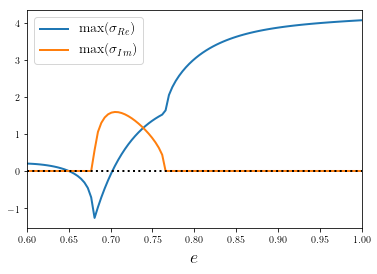

In [15]:
plt.plot(e_range,real_eigs,label=r'$\max(\sigma_{Re})$')
plt.plot(e_range,imag_eigs,label=r'$\max(\sigma_{Im})$')
plt.plot(e_range,np.zeros_like(e_range),'k:')
#hopf_instability = np.amin(np.where(real_eigs[np.amin(np.where(imag_eigs>0)):]>=0))+np.amin(np.where(imag_eigs>0))
#plt.scatter(e_range[hopf_instability],0,s=200,marker="*",c='r')
plt.xlabel(r'$e$')
plt.legend(loc='best')
plt.xlim([e_range[0],e_range[-1]])
plt.savefig('rmm_allee_effect_eigs_to_e.png')

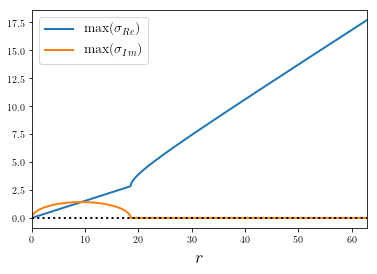

In [16]:
plt.plot(r_range,real_eigs_r,label=r'$\max(\sigma_{Re})$')
plt.plot(r_range,imag_eigs_r,label=r'$\max(\sigma_{Im})$')
plt.plot(r_range,np.zeros_like(r_range),'k:')
#hopf_instability = np.amin(np.where(real_eigs[np.amin(np.where(imag_eigs>0)):]>=0))+np.amin(np.where(imag_eigs>0))
#plt.scatter(e_range[hopf_instability],0,s=200,marker="*",c='r')
plt.xlabel(r'$r$')
plt.legend(loc='best')
plt.xlim([r_range[0],r_range[-1]])
plt.savefig('rmm_allee_effect_eigs_to_r.png')